Now we are ready to analyse the data.

Goals:
1. Compare average rent/sale prices of 1/2/3 bedrooms.
2. Compare average gross rental yields of 1/2/3 bedrooms.
3. Propose a rough price model, reflecting how the distance to CBD and the distance to train station affect the sale price.

Tools:
1. pandas
2. matplotlib
3. statsmodels

In [1]:
import pandas as pd

In [2]:
rent_data = pd.read_csv('rent_data.csv')
sale_data = pd.read_csv('sale_data.csv')

In [3]:
rent_data.head(5)

,Suburb,Address,Price,Bedrooms,Bathrooms,Parkings,Latitude,Longitude,Distance_to_CBD,Distance_to_station
0,haymarket,Level 18/178 Thomas Street HAYMARKET NSW 2000,1200.0,2.0,2.0,2.0,-33.881470,151.202652,976.123926,673.602749
1,haymarket,303 Castlereagh Street HAYMARKET NSW 2000,1050.0,2.0,2.0,1.0,-33.878826,151.208389,663.006310,67.365133
2,haymarket,N8.06/33 Ultimo Road HAYMARKET NSW 2000,755.0,1.0,1.0,1.0,-33.881050,151.202438,939.234868,669.943288
3,haymarket,Level 32/2 Quay Street HAYMARKET NSW 2000,580.0,1.0,1.0,NaN,-33.880170,151.203217,822.762116,566.337856
4,haymarket,S909/178 Thomas Street HAYMARKET NSW 2000,NaN,2.0,2.0,1.0,-33.881470,151.202652,976.123926,673.602749


In [4]:
sale_data.head(5)

,Suburb,Address,Price,Bedrooms,Bathrooms,Parkings,Latitude,Longitude,Distance_to_CBD,Distance_to_station
0,haymarket,1009/2 Quay Street HAYMARKET NSW 2000,1300000.0,2.0,2.0,1.0,-33.880170,151.203217,822.762116,566.337856
1,haymarket,Darling Square 61 Harbour Street HAYMARKET NSW...,NaN,2.0,1.0,1.0,-33.878048,151.203278,602.638826,531.725213
2,haymarket,Darling Square Tumbalong Boulevard HAYMARKET N...,850000.0,1.0,1.0,NaN,-33.878426,151.201965,699.229419,650.916474
3,haymarket,19E/Darling Street Darling Square HAYMARKET NS...,2400000.0,2.0,2.0,1.0,-33.879250,151.201111,819.191501,734.650946
4,haymarket,2 Hay St HAYMARKET NSW 2000,2000000.0,3.0,2.0,1.0,-33.878357,151.201447,720.540982,698.963591


**1. Compare average rent/sale prices of 1/2/3 bedrooms.**

In [5]:
rent_bedroom1_data = rent_data[rent_data['Bedrooms'] == 1]
rent_bedroom2_data = rent_data[rent_data['Bedrooms'] == 2]
rent_bedroom3_data = rent_data[rent_data['Bedrooms'] == 3]

sale_bedroom1_data = sale_data[sale_data['Bedrooms'] == 1]
sale_bedroom2_data = sale_data[sale_data['Bedrooms'] == 2]
sale_bedroom3_data = sale_data[sale_data['Bedrooms'] == 3]

rent_bedroom1_price = rent_bedroom1_data.groupby(['Suburb'])['Price'].mean().round(0)
rent_bedroom2_price = rent_bedroom2_data.groupby(['Suburb'])['Price'].mean().round(0)
rent_bedroom3_price = rent_bedroom3_data.groupby(['Suburb'])['Price'].mean().round(0)

sale_bedroom1_price = sale_bedroom1_data.groupby(['Suburb'])['Price'].mean().round(0)
sale_bedroom2_price = sale_bedroom2_data.groupby(['Suburb'])['Price'].mean().round(0)
sale_bedroom3_price = sale_bedroom3_data.groupby(['Suburb'])['Price'].mean().round(0)

In [6]:
compare = pd.DataFrame({
    'rent 1 bedroom': rent_bedroom1_price,
    'rent 2 bedrooms': rent_bedroom2_price,
    'rent 3 bedrooms': rent_bedroom3_price,
    'buy 1 bedroom': sale_bedroom1_price,
    'buy 2 bedrooms': sale_bedroom2_price,
    'buy 3 bedrooms': sale_bedroom3_price
})
compare

,buy 1 bedroom,buy 2 bedrooms,buy 3 bedrooms,rent 1 bedroom,rent 2 bedrooms,rent 3 bedrooms
ashfield,642833.0,841792.0,1087667.0,399.0,528.0,651.0
auburn,532833.0,565997.0,804341.0,340.0,477.0,551.0
burwood,642777.0,900550.0,1491750.0,384.0,629.0,722.0
campsie,557000.0,699909.0,796333.0,365.0,496.0,633.0
chatswood,645000.0,1323867.0,1680000.0,604.0,714.0,1098.0
eastwood,750000.0,860000.0,1425000.0,310.0,501.0,617.0
epping,688848.0,875377.0,1251667.0,474.0,549.0,631.0
haymarket,785667.0,1368889.0,2000000.0,725.0,1076.0,NaN
hurstville,627706.0,819684.0,1036273.0,433.0,520.0,664.0
marsfield,NaN,710000.0,920000.0,480.0,511.0,629.0


Sort rent price of 2 bedrooms in terms of suburbs.

In [7]:
rent_bedroom2_price.sort_values(ascending=False)

Suburb
sydney         1167.0
haymarket      1076.0
ultimo          865.0
zetland         821.0
waterloo        751.0
mascot          714.0
chatswood       714.0
rhodes          673.0
burwood         629.0
strathfield     578.0
epping          549.0
ashfield        528.0
hurstville      520.0
parramatta      512.0
marsfield       511.0
eastwood        501.0
campsie         496.0
auburn          477.0
Name: Price, dtype: float64

Sort sale price for 2 bedrooms.

In [8]:
sale_bedroom2_price.sort_values(ascending=False)

Suburb
sydney         1386833.0
haymarket      1368889.0
chatswood      1323867.0
zetland         996391.0
waterloo        985514.0
rhodes          965250.0
mascot          933053.0
burwood         900550.0
ultimo          877627.0
epping          875377.0
eastwood        860000.0
ashfield        841792.0
hurstville      819684.0
strathfield     812308.0
marsfield       710000.0
campsie         699909.0
parramatta      697687.0
auburn          565997.0
Name: Price, dtype: float64

Take a look at rent info for 2 bedrooms at Rhodes.

In [9]:
rhodes_rent_data = rent_data[(rent_data['Suburb'] == 'rhodes') &
                   (rent_data['Bedrooms'] == 2)].sort_values('Price', ascending=False)
rhodes_rent_data.head(5)

,Suburb,Address,Price,Bedrooms,Bathrooms,Parkings,Latitude,Longitude,Distance_to_CBD,Distance_to_station
323,rhodes,2308/46 Walker St RHODES NSW 2138,900.0,2.0,2.0,1.0,-33.827408,151.087036,12132.621626,350.744100
307,rhodes,721/4 Marquet Street RHODES NSW 2138,780.0,2.0,2.0,1.0,-33.829952,151.085068,12184.401309,197.889909
339,rhodes,79 Shoreline Drive RHODES NSW 2138,750.0,2.0,2.0,1.0,-33.826653,151.086884,12180.685866,434.858487
308,rhodes,712/3 Timbrol Ave RHODES NSW 2138,730.0,2.0,2.0,1.0,-33.826347,151.085600,12302.699640,487.806979
309,rhodes,705/52-54 WALKER STREET RHODES NSW 2138,720.0,2.0,2.0,1.0,-33.825962,151.087100,12195.294925,511.088646


**2. Compare average gross rental yields of 1/2/3 bedrooms.**

Gross rental yield = (Annual rental income / Property value) * 100

In [10]:
gry_bedroom1 = compare['rent 1 bedroom'] * 52 / compare['buy 1 bedroom'] * 100
gry_bedroom2 = compare['rent 2 bedrooms'] * 52 / compare['buy 2 bedrooms'] * 100
gry_bedroom3 = compare['rent 3 bedrooms'] * 52 / compare['buy 3 bedrooms'] * 100
gry = pd.DataFrame({
    '1 bedroom': gry_bedroom1.round(2),
    '2 bedrooms': gry_bedroom2.round(2),
    '3 bedrooms': gry_bedroom3.round(2)
})
gry

,1 bedroom,2 bedrooms,3 bedrooms
ashfield,3.23,3.26,3.11
auburn,3.32,4.38,3.56
burwood,3.11,3.63,2.52
campsie,3.41,3.69,4.13
chatswood,4.87,2.80,3.40
eastwood,2.15,3.03,2.25
epping,3.58,3.26,2.62
haymarket,4.80,4.09,NaN
hurstville,3.59,3.30,3.33
marsfield,NaN,3.74,3.56


**3. Propose a rough price model, reflecting how the distance to CBD and the distance to train station affect the sale price.**

In [11]:
import matplotlib.pyplot as plt

Plot (distance to cbd, sale price) for 2 bedrooms whose distances to train stations are in range [0, 400) (close), [400-800) (median), and [800, $\infty$) (far) respectively .

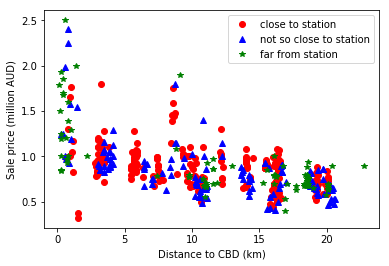

In [12]:
close = sale_bedroom2_data[sale_bedroom2_data['Distance_to_station'] < 600]
median = sale_bedroom2_data[(sale_bedroom2_data['Distance_to_station'] >= 600) &
                            (sale_bedroom2_data['Distance_to_station'] < 1200)]
far = sale_bedroom2_data[sale_bedroom2_data['Distance_to_station'] >= 1200]
x_close = close['Distance_to_CBD'] / 1000
y_close = close['Price'] / 1000000
x_median = median['Distance_to_CBD'] / 1000
y_median = median['Price'] / 1000000
x_far = far['Distance_to_CBD'] / 1000
y_far = far['Price'] / 1000000
plt.xlabel('Distance to CBD (km)')
plt.ylabel('Sale price (million AUD)')
plt.plot(x_close, y_close, 'ro', label='close to station')
plt.plot(x_median, y_median, 'b^', label='not so close to station')
plt.plot(x_far, y_far, 'g*', label='far from station')
plt.legend()
plt.show()

Plot (average distance tocbd, sale price) for 2 bedrooms in each suburb.

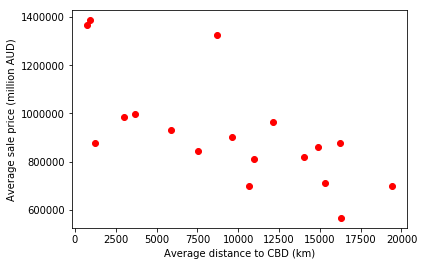

In [13]:
suburb_sale_mean = sale_bedroom2_data.groupby('Suburb')['Price', 'Distance_to_CBD'].mean()
plt.xlabel('Average distance to CBD (km)')
plt.ylabel('Average sale price (million AUD)')
plt.plot(suburb_sale_mean['Distance_to_CBD'], suburb_sale_mean['Price'], 'ro')
plt.show()

**Insight 1: There is a negatively correlation between the sale price and the distance to CBD.**

**Insight 2: The distance to station has little affection on the sale price**

Further verify insight 2.

Plot (distance to station, sale price) for 2 bedrooms whose distances to CBD are in range [0, 2000) (close), [2000-10000) (median), and [10000, $\infty$) (far) respectively .

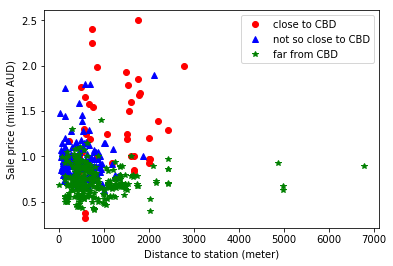

In [14]:
close = sale_bedroom2_data[sale_bedroom2_data['Distance_to_CBD'] < 2000]
median = sale_bedroom2_data[(sale_bedroom2_data['Distance_to_CBD'] >= 2000) &
                            (sale_bedroom2_data['Distance_to_CBD'] < 10000)]
far = sale_bedroom2_data[sale_bedroom2_data['Distance_to_CBD'] >= 10000]
x_close = close['Distance_to_station']
y_close = close['Price'] / 1000000
x_median = median['Distance_to_station']
y_median = median['Price'] / 1000000
x_far = far['Distance_to_station']
y_far = far['Price'] / 1000000
plt.xlabel('Distance to station (meter)')
plt.ylabel('Sale price (million AUD)')
plt.plot(x_close, y_close, 'ro', label='close to CBD')
plt.plot(x_median, y_median, 'b^', label='not so close to CBD')
plt.plot(x_far, y_far, 'g*', label='far from CBD')
plt.legend()
plt.show()

Suppose $p$ is the sale price and $d$ is the distance to CBD.

**Hypothesis price model 1: ** $p = c_1\cdot d + c_2$

Compute coefficients $a,b,c$ using linear regression.

In [15]:
import statsmodels.api as sm

/Users/mystery/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
sale_bedroom2_with_price = sale_bedroom2_data[sale_bedroom2_data['Price'].notnull()]
p = sale_bedroom2_with_price['Price'] / 1000000    # million
d = sale_bedroom2_with_price['Distance_to_CBD'] / 1000    # km
d = sm.add_constant(d)
model = sm.OLS(p, d).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     241.8
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           6.15e-45
Time:                        19:14:35   Log-Likelihood:                 22.247
No. Observations:                 514   AIC:                            -40.49
Df Residuals:                     512   BIC:                            -32.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1521      0.021     

**Interpretation 1：**

- $c_1 = -0.0256$: The sales price drops AU$25600 every 1 km away from CBD.

- $c_2 = 1.1521$: The sales price of CBD property is AU$1152100.